In [121]:
import pandas as pd #tablas https://pandas.pydata.org/docs/user_guide/pyarrow.html
import numpy as np #estadistica https://numpy.org/doc/1.25/user/index.html#user
import matplotlib.pyplot as plt #gráficos https://matplotlib.org/stable/plot_types/index.html
import seaborn as sns #gráficos https://seaborn.pydata.org/tutorial/regression.html
from sklearn import linear_model #modelo de regresion https://scikit-learn.org/stable/
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from datetime import datetime #https://docs.python.org/3/library/datetime.html
from datetime import timedelta #this is a good time to learn about dates and timestamps. You can find some info here:
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import ttest_1samp
import scipy.stats as st
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
import pymysql                        # for getting data from a SQL database
from sqlalchemy import create_engine  # for establishing the connection and authentication
from getpass import getpass  # To get the password without showing the input

In [122]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

In [123]:
songs = pd.read_csv('all_songs&ft.csv') 

In [124]:
songs = songs.drop_duplicates().reset_index()

In [125]:
songs

,index,track.name,name,song_id,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,Firework,Katy Perry,4lCv7b86sLynZbXhfScfm2,0.638,0.826,8,-4.968,1,0.0479,...,0.0803,0.649,124.072,audio_features,4lCv7b86sLynZbXhfScfm2,spotify:track:4lCv7b86sLynZbXhfScfm2,https://api.spotify.com/v1/tracks/4lCv7b86sLyn...,https://api.spotify.com/v1/audio-analysis/4lCv...,227880,4
1,1,All We Are,OneRepublic,1Jx69b09LKTuBQxkEiFfVX,0.397,0.817,2,-5.495,1,0.0420,...,0.3160,0.416,158.004,audio_features,1Jx69b09LKTuBQxkEiFfVX,spotify:track:1Jx69b09LKTuBQxkEiFfVX,https://api.spotify.com/v1/tracks/1Jx69b09LKTu...,https://api.spotify.com/v1/audio-analysis/1Jx6...,266227,4
2,2,Wake Up Alone,Amy Winehouse,4u83mwF5tUuWlXS86UOXdu,0.384,0.527,11,-5.294,0,0.0269,...,0.1560,0.222,100.730,audio_features,4u83mwF5tUuWlXS86UOXdu,spotify:track:4u83mwF5tUuWlXS86UOXdu,https://api.spotify.com/v1/tracks/4u83mwF5tUuW...,https://api.spotify.com/v1/audio-analysis/4u83...,221200,3
3,3,The Man Who Can't Be Moved,The Script,4Musyaro0NM5Awx8b5c627,0.608,0.629,10,-5.024,1,0.0264,...,0.0978,0.325,99.953,audio_features,4Musyaro0NM5Awx8b5c627,spotify:track:4Musyaro0NM5Awx8b5c627,https://api.spotify.com/v1/tracks/4Musyaro0NM5...,https://api.spotify.com/v1/audio-analysis/4Mus...,241467,4
4,4,Rolling in the Deep,Adele,1CkvWZme3pRgbzaxZnTl5X,0.729,0.756,8,-5.119,1,0.0294,...,0.0527,0.522,104.945,audio_features,1CkvWZme3pRgbzaxZnTl5X,spotify:track:1CkvWZme3pRgbzaxZnTl5X,https://api.spotify.com/v1/tracks/1CkvWZme3pRg...,https://api.spotify.com/v1/audio-analysis/1Ckv...,228293,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12153,21153,I AM WOMAN,Emmy Meli,3nOz1U41SZZ0N3fuUWr9nb,0.646,0.471,10,-9.247,1,0.1570,...,0.1250,0.455,170.084,audio_features,3nOz1U41SZZ0N3fuUWr9nb,spotify:track:3nOz1U41SZZ0N3fuUWr9nb,https://api.spotify.com/v1/tracks/3nOz1U41SZZ0...,https://api.spotify.com/v1/audio-analysis/3nOz...,232813,4
12154,21154,The Girl,City and Colour,1IFRVS4t1olI0XG9RBWdKH,0.404,0.542,10,-7.578,1,0.0349,...,0.1370,0.183,109.166,audio_features,1IFRVS4t1olI0XG9RBWdKH,spotify:track:1IFRVS4t1olI0XG9RBWdKH,https://api.spotify.com/v1/tracks/1IFRVS4t1olI...,https://api.spotify.com/v1/audio-analysis/1IFR...,360107,4
12155,21155,The Funeral,Band of Horses,5lRzWDEe7UuedU2QPsFg0K,0.319,0.757,0,-6.117,0,0.0432,...,0.1020,0.101,122.465,audio_features,5lRzWDEe7UuedU2QPsFg0K,spotify:track:5lRzWDEe7UuedU2QPsFg0K,https://api.spotify.com/v1/tracks/5lRzWDEe7Uue...,https://api.spotify.com/v1/audio-analysis/5lRz...,322173,4
12156,21156,Hallucinogenics,Matt Maeson,6bLU8e0LGyztE9iD5DWBQ1,0.549,0.653,0,-7.470,1,0.0503,...,0.0969,0.287,121.348,audio_features,6bLU8e0LGyztE9iD5DWBQ1,spotify:track:6bLU8e0LGyztE9iD5DWBQ1,https://api.spotify.com/v1/tracks/6bLU8e0LGyzt...,https://api.spotify.com/v1/audio-analysis/6bLU...,187173,4


In [126]:
songs_attributes= songs.select_dtypes(include=[np.number])
songs_attributes

,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,0.638,0.826,8,-4.968,1,0.0479,0.1390,0.000000,0.0803,0.649,124.072,227880,4
1,1,0.397,0.817,2,-5.495,1,0.0420,0.0966,0.000008,0.3160,0.416,158.004,266227,4
2,2,0.384,0.527,11,-5.294,0,0.0269,0.5420,0.000000,0.1560,0.222,100.730,221200,3
3,3,0.608,0.629,10,-5.024,1,0.0264,0.4230,0.000000,0.0978,0.325,99.953,241467,4
4,4,0.729,0.756,8,-5.119,1,0.0294,0.1310,0.000000,0.0527,0.522,104.945,228293,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12153,21153,0.646,0.471,10,-9.247,1,0.1570,0.1220,0.000000,0.1250,0.455,170.084,232813,4
12154,21154,0.404,0.542,10,-7.578,1,0.0349,0.8370,0.000072,0.1370,0.183,109.166,360107,4
12155,21155,0.319,0.757,0,-6.117,0,0.0432,0.0160,0.000000,0.1020,0.101,122.465,322173,4
12156,21156,0.549,0.653,0,-7.470,1,0.0503,0.4570,0.000000,0.0969,0.287,121.348,187173,4


Clustering the features with KMEANS

In [127]:
X = songs_attributes

In [128]:
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(X)

In [129]:
pd.DataFrame(X_prep,columns=X.columns).head()

,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-1.589099,0.321318,0.792327,0.787791,0.598149,0.731109,-0.377219,-0.316151,-0.261176,-0.704899,0.679707,0.119614,0.053962,0.169160
1,-1.588937,-1.339608,0.748009,-0.878231,0.431589,0.731109,-0.454842,-0.471237,-0.261115,0.826871,-0.320411,1.320494,0.843955,0.169160
2,-1.588776,-1.429202,-0.680019,1.620802,0.495116,-1.367786,-0.653503,1.157905,-0.261176,-0.212939,-1.153127,-0.706478,-0.083654,-3.185901
3,-1.588615,0.114564,-0.177747,1.343132,0.580450,0.731109,-0.660081,0.722638,-0.261176,-0.591169,-0.711015,-0.733977,0.333870,0.169160
4,-1.588453,0.948473,0.447631,0.787791,0.550425,0.731109,-0.620612,-0.345412,-0.261176,-0.884266,0.134578,-0.557306,0.062470,0.169160


In [130]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=1234)
kmeans.fit(X_prep)

/Users/agustinredondoarena/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=1234)

In [131]:
clusters = kmeans.predict(X_prep)

In [132]:
pd.Series(clusters).value_counts().sort_index()

0    5345
1    2168
2    3239
3     970
4     436
dtype: int64

In [133]:
clusters

array([0, 0, 1, ..., 2, 0, 0], dtype=int32)

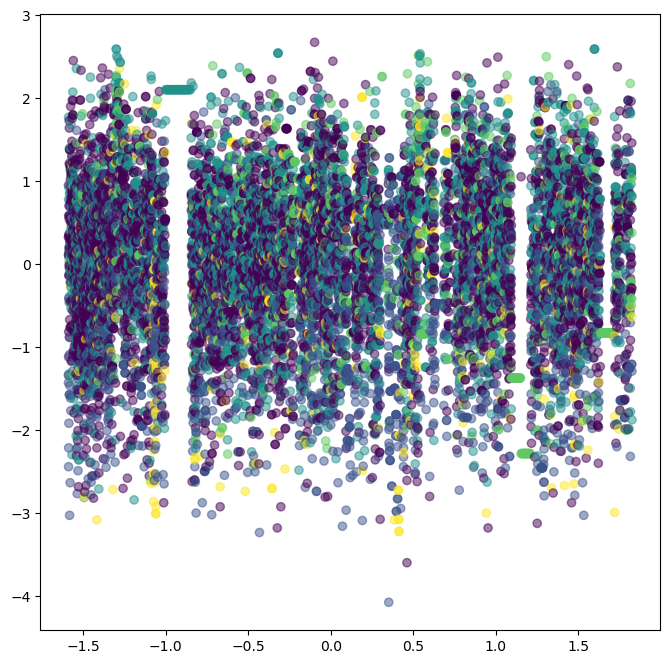

In [134]:
plt.figure(figsize=(8, 8))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=clusters,alpha=0.5)
plt.show()

In [135]:
kmeans.inertia_ 

121818.92709711316

/Users/agustinredondoarena/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/agustinredondoarena/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/agustinredondoarena/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/agustinredondoarena/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

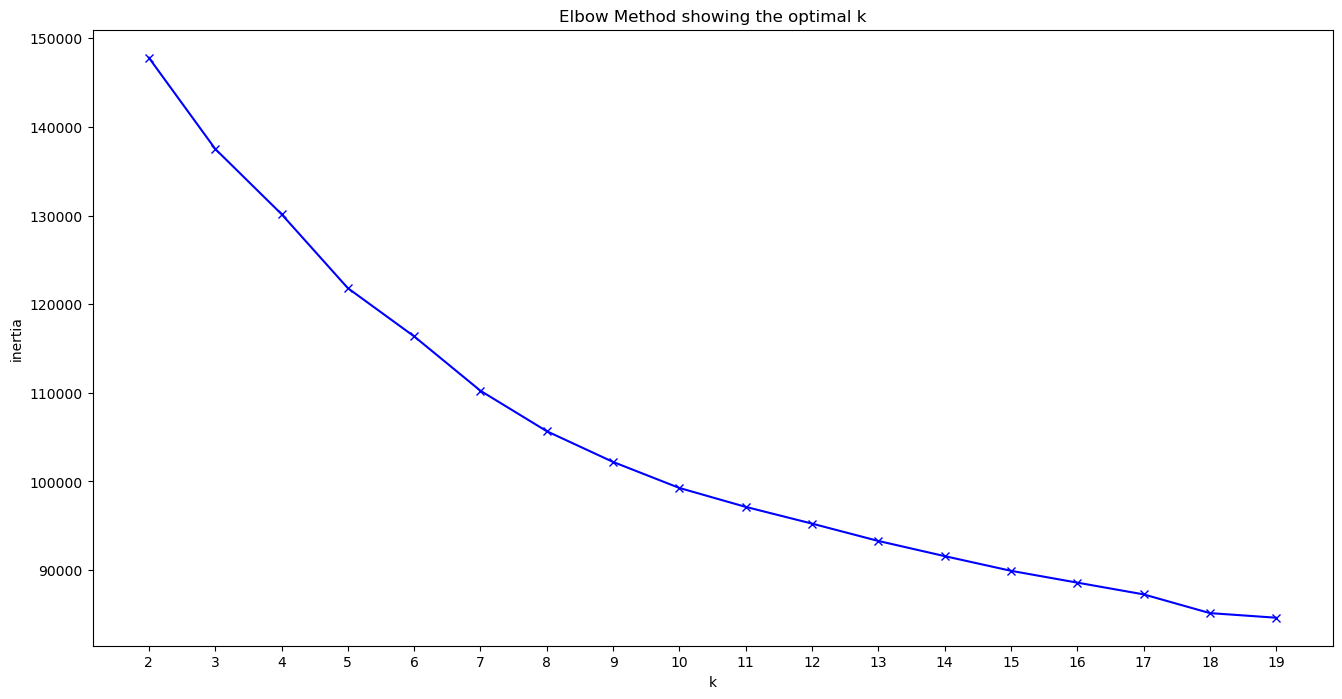

In [136]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

/Users/agustinredondoarena/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/agustinredondoarena/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/agustinredondoarena/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/agustinredondoarena/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

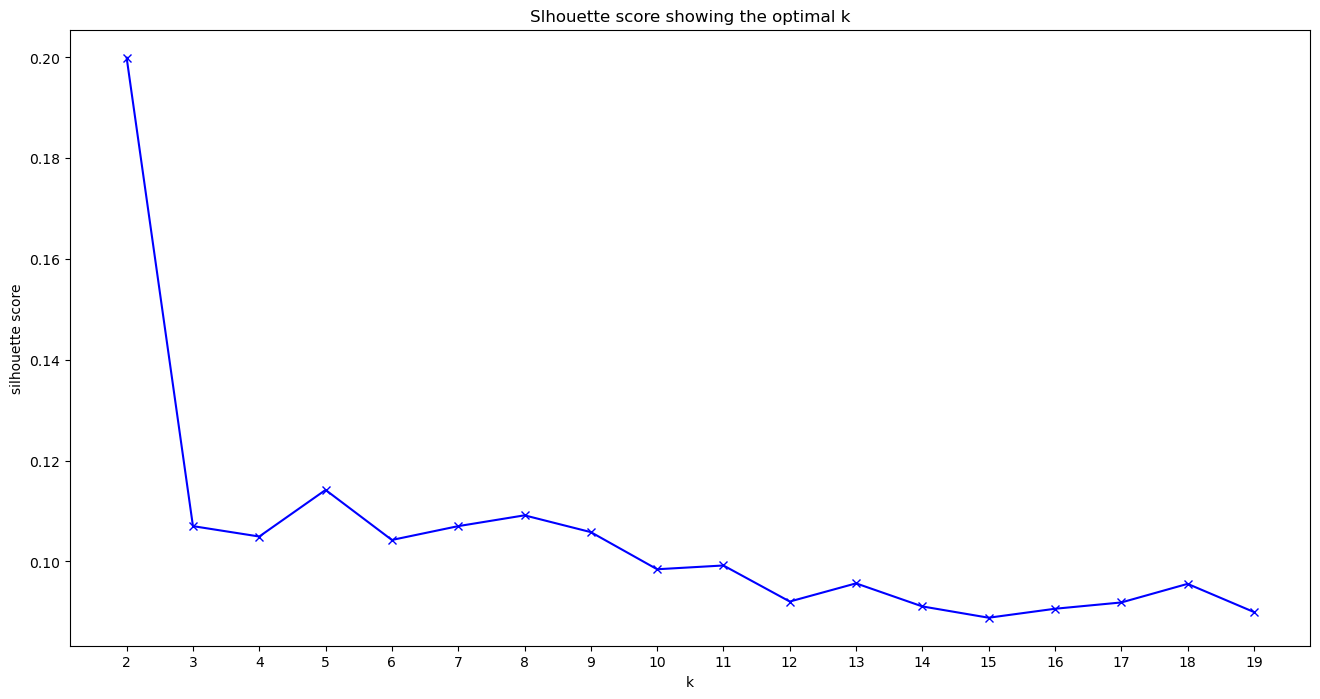

In [137]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

# Opitmum K = 4

In [138]:
X = songs_attributes

In [139]:
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(X)

In [140]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(X_prep)

/Users/agustinredondoarena/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=1234)

In [141]:
clusters = kmeans.predict(X_prep)

In [142]:
pd.Series(clusters).value_counts().sort_index()

0     434
1    5698
2    2317
3    3709
dtype: int64

In [143]:
clusters

array([1, 3, 2, ..., 3, 2, 1], dtype=int32)

EXTRA FOR 07/09/2023. Changing the array into a column in the dataframe, modifying the search engine so when a song is given, it gives you back a song in the same cluster (technically a similar song)

In [144]:
songs["cluster"] = clusters

In [145]:
songs.head()

,index,track.name,name,song_id,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
0,0,Firework,Katy Perry,4lCv7b86sLynZbXhfScfm2,0.638,0.826,8,-4.968,1,0.0479,...,0.649,124.072,audio_features,4lCv7b86sLynZbXhfScfm2,spotify:track:4lCv7b86sLynZbXhfScfm2,https://api.spotify.com/v1/tracks/4lCv7b86sLyn...,https://api.spotify.com/v1/audio-analysis/4lCv...,227880,4,1
1,1,All We Are,OneRepublic,1Jx69b09LKTuBQxkEiFfVX,0.397,0.817,2,-5.495,1,0.0420,...,0.416,158.004,audio_features,1Jx69b09LKTuBQxkEiFfVX,spotify:track:1Jx69b09LKTuBQxkEiFfVX,https://api.spotify.com/v1/tracks/1Jx69b09LKTu...,https://api.spotify.com/v1/audio-analysis/1Jx6...,266227,4,3
2,2,Wake Up Alone,Amy Winehouse,4u83mwF5tUuWlXS86UOXdu,0.384,0.527,11,-5.294,0,0.0269,...,0.222,100.730,audio_features,4u83mwF5tUuWlXS86UOXdu,spotify:track:4u83mwF5tUuWlXS86UOXdu,https://api.spotify.com/v1/tracks/4u83mwF5tUuW...,https://api.spotify.com/v1/audio-analysis/4u83...,221200,3,2
3,3,The Man Who Can't Be Moved,The Script,4Musyaro0NM5Awx8b5c627,0.608,0.629,10,-5.024,1,0.0264,...,0.325,99.953,audio_features,4Musyaro0NM5Awx8b5c627,spotify:track:4Musyaro0NM5Awx8b5c627,https://api.spotify.com/v1/tracks/4Musyaro0NM5...,https://api.spotify.com/v1/audio-analysis/4Mus...,241467,4,1
4,4,Rolling in the Deep,Adele,1CkvWZme3pRgbzaxZnTl5X,0.729,0.756,8,-5.119,1,0.0294,...,0.522,104.945,audio_features,1CkvWZme3pRgbzaxZnTl5X,spotify:track:1CkvWZme3pRgbzaxZnTl5X,https://api.spotify.com/v1/tracks/1CkvWZme3pRg...,https://api.spotify.com/v1/audio-analysis/1Ckv...,228293,4,1


In [146]:
import random

In [147]:
def search_random_title(input_title):
    if input_title in songs['track.name'].values:
        input_cluster = songs.loc[songs['track.name'] == input_title, 'cluster'].values[0]

        cluster_songs = songs[songs['cluster'] == input_cluster]

        random_title = random.choice(cluster_songs['track.name'])

        while random_title == input_title:
            random_title = random.choice(cluster_songs['track.name'])

        return random_title
    else:
        return "Sorry, we don't have this title."

input_title = input("Enter a song title: ")
result = search_random_title(input_title)
print(result)
#input = Rolling in the Deep

Sugar


In [149]:
#Check 
songs[songs["track.name"] == "Sugar"]

,index,track.name,name,song_id,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
125,127,Sugar,Maroon 5,2iuZJX9X9P0GKaE93xcPjk,0.748,0.788,1,-7.055,1,0.0334,...,0.884,120.076,audio_features,2iuZJX9X9P0GKaE93xcPjk,spotify:track:2iuZJX9X9P0GKaE93xcPjk,https://api.spotify.com/v1/tracks/2iuZJX9X9P0G...,https://api.spotify.com/v1/audio-analysis/2iuZ...,235493,4,1
2328,3013,Sugar,Sister Sparrow,1THXgalXpkfvIPlxp6U05K,0.532,0.739,7,-4.853,0,0.1950,...,0.933,203.687,audio_features,1THXgalXpkfvIPlxp6U05K,spotify:track:1THXgalXpkfvIPlxp6U05K,https://api.spotify.com/v1/tracks/1THXgalXpkfv...,https://api.spotify.com/v1/audio-analysis/1THX...,182213,4,3
4093,6441,Sugar,Terror Jr,2lJaRSPvabPV098r9mkV8a,0.660,0.651,0,-6.004,0,0.1330,...,0.590,80.500,audio_features,2lJaRSPvabPV098r9mkV8a,spotify:track:2lJaRSPvabPV098r9mkV8a,https://api.spotify.com/v1/tracks/2lJaRSPvabPV...,https://api.spotify.com/v1/audio-analysis/2lJa...,192671,4,1
10345,17840,Sugar,Maren Morris,6f9UXnmk0ieJDvwN0ML4Eh,0.565,0.755,4,-4.775,1,0.0785,...,0.681,75.456,audio_features,6f9UXnmk0ieJDvwN0ML4Eh,spotify:track:6f9UXnmk0ieJDvwN0ML4Eh,https://api.spotify.com/v1/tracks/6f9UXnmk0ieJ...,https://api.spotify.com/v1/audio-analysis/6f9U...,189147,4,1
